In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [ ]:
# Load the datasets
customers_path = '/assets/Customers.csv'
products_path = '/assets/Products.csv'
transactions_path = '/assets/Transactions.csv'

# Reading the datasets
customers_df = pd.read_csv('/assets/Customers.csv')
products_df = pd.read_csv('/assets/Products.csv')
transactions_df = pd.read_csv('/assets/Transactions.csv')

: 

In [ ]:
# Basic Info
def basic_info():
    print("Customers Dataset Info")
    print(customers_df.info(), "\n")

    print("Products Dataset Info")
    print(products_df.info(), "\n")

    print("Transactions Dataset Info")
    print(transactions_df.info(), "\n")

# Checking for Missing Values
def missing_values():
    print("Missing Values in Customers:")
    print(customers_df.isnull().sum(), "\n")

    print("Missing Values in Products:")
    print(products_df.isnull().sum(), "\n")

    print("Missing Values in Transactions:")
    print(transactions_df.isnull().sum(), "\n")

# Descriptive Statistics
def descriptive_stats():
    print("Descriptive Statistics for Transactions:")
    print(transactions_df.describe(), "\n")

# Merge Datasets
def merge_datasets():
    merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')
    return merged_df

: 

In [ ]:
# Visualization Functions
def visualize_sales_by_category(merged_df):
    category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_sales.index, y=category_sales.values)
    plt.title('Total Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales (USD)')
    plt.xticks(rotation=45)
    plt.show()

def visualize_sales_by_region(merged_df):
    region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_sales.index, y=region_sales.values)
    plt.title('Total Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales (USD)')
    plt.xticks(rotation=45)
    plt.show()

def visualize_top_customers(merged_df):
    top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_customers.values, y=top_customers.index, orient='h')
    plt.title('Top 10 Customers by Total Sales')
    plt.xlabel('Total Sales (USD)')
    plt.ylabel('Customer Name')
    plt.show()

def visualize_monthly_sales(merged_df):
    merged_df['TransactionMonth'] = pd.to_datetime(merged_df['TransactionDate']).dt.to_period('M')
    monthly_sales = merged_df.groupby('TransactionMonth')['TotalValue'].sum()
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales (USD)')
    plt.grid(True)
    plt.show()

def analyze_customer_retention(merged_df):
    customer_transactions = merged_df.groupby('CustomerID').size()
    repeat_customers = (customer_transactions > 1).sum()
    one_time_customers = (customer_transactions == 1).sum()

    labels = ['Repeat Customers', 'One-Time Customers']
    sizes = [repeat_customers, one_time_customers]

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    plt.title('Customer Retention Analysis')
    plt.axis('equal')
    plt.show()


: 

Customers Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Co

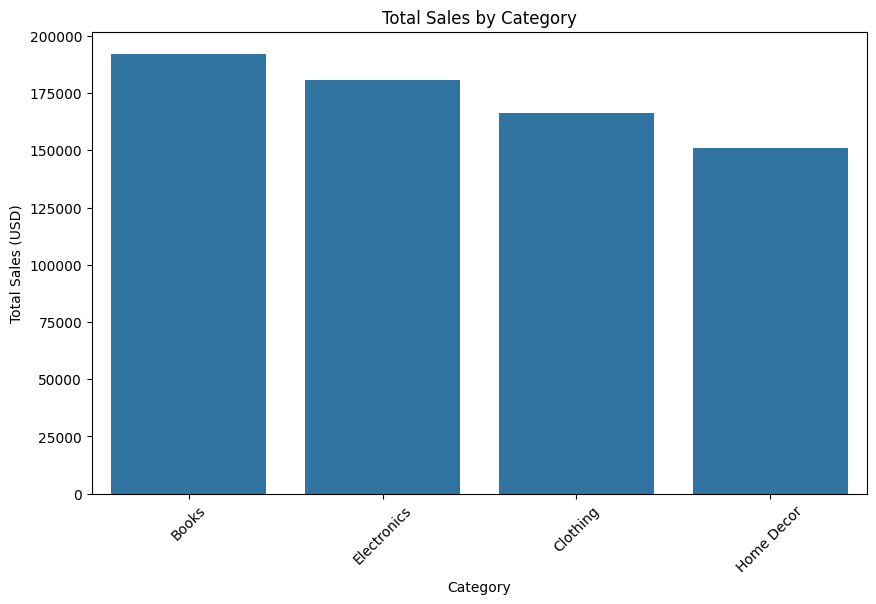

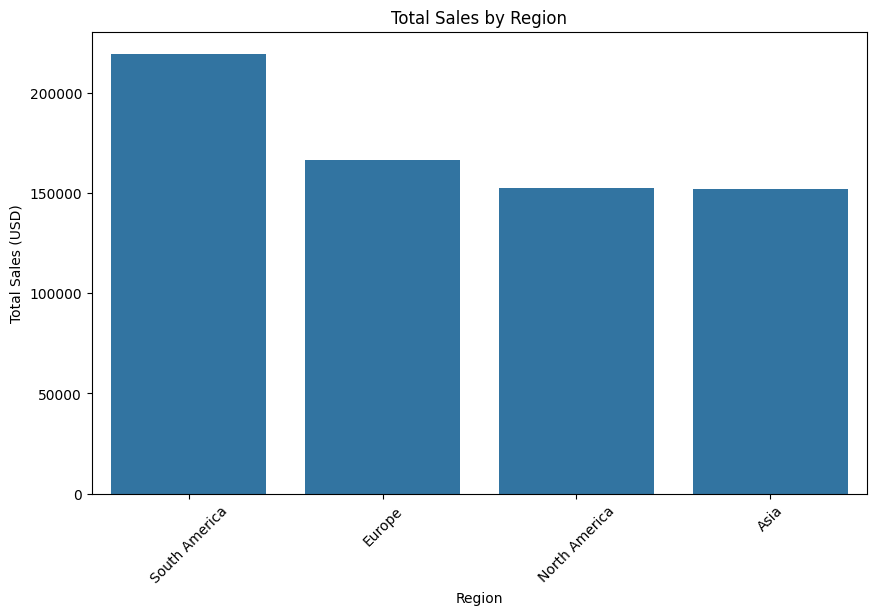

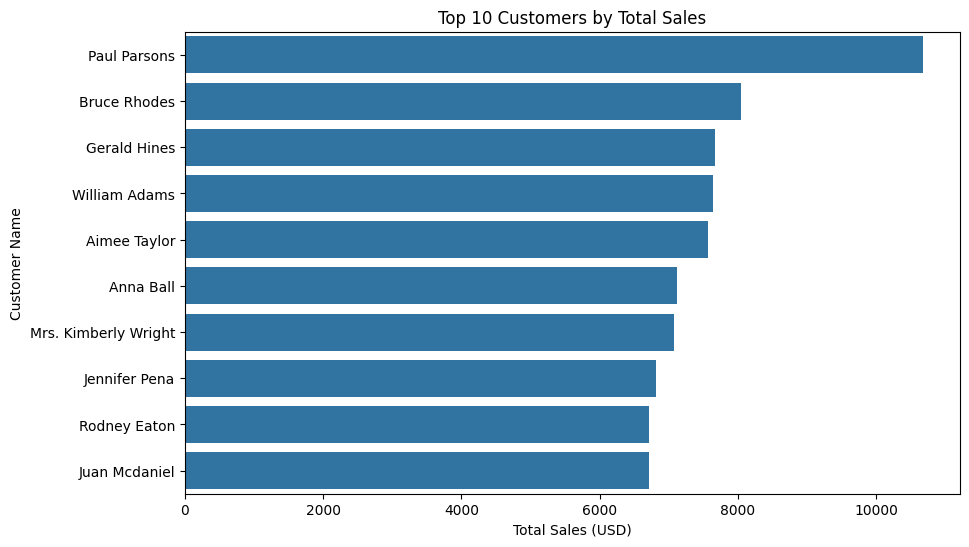

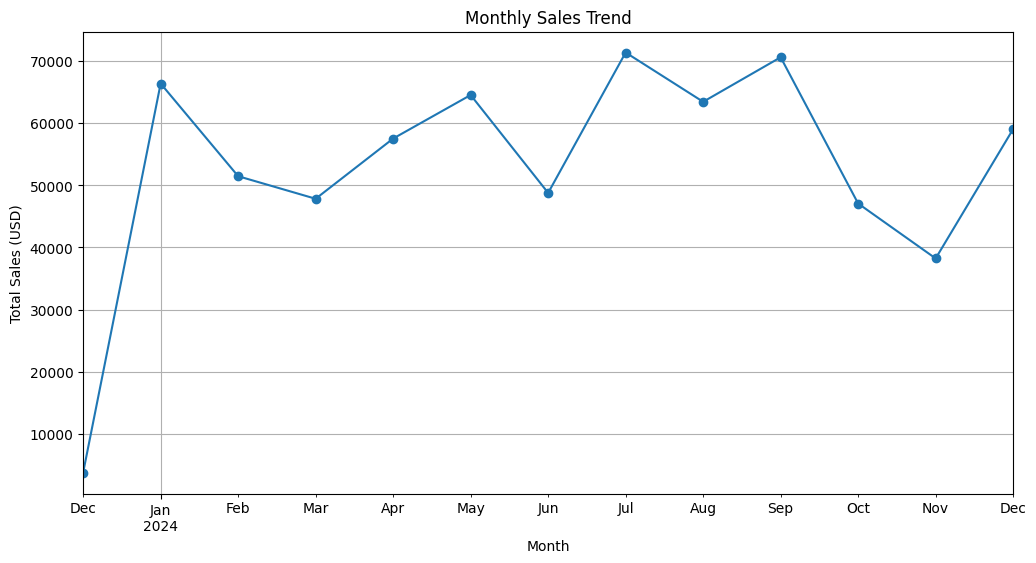

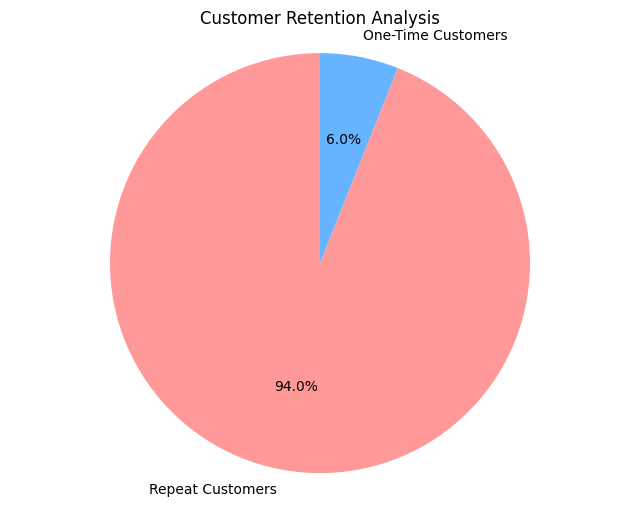

In [15]:
# Run Analysis
if __name__ == "__main__":
    # Initial Exploration
    basic_info()
    missing_values()
    descriptive_stats()

    # Merging datasets
    merged_df = merge_datasets()

    # Visualizations
    visualize_sales_by_category(merged_df)
    visualize_sales_by_region(merged_df)
    visualize_top_customers(merged_df)
    visualize_monthly_sales(merged_df)
    analyze_customer_retention(merged_df)
